# Solucionador de nonogramas mediante DL

En este notebook se intentará resolver nonogramas de 10x10 utilizando técnicas de aprendizaje profundo.

## Importación

### Importación del conjunto de datos

En este apartado se importarán los datos con los que se van a entrentar los modelos.

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

### Importación de librerías

En este apartado se importarán las librerías y utilidades necesarias para entrenar los modelos. Parte de las funcionalidades han sido implementadas en un módulo independiente a este notebook.

In [12]:
from utilidades import load_data
import utilidades_15 as u

In [13]:
x_train, y_train = load_data(train_path='./data/x_train_15x15.npz', 
                             target_path='./data/y_train_15x15.npz')
x_test, y_test = load_data(train_path='./data/x_test_15x15.npz', 
                           target_path='./data/y_test_15x15.npz')

In [14]:
x_train.shape

(361094, 100)

In [15]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam

## Definición de los modelos


### Introducción

En este apartado se van ha entrenar diferentes modelos para comprobar el rendimiento de los mismos.

Cada vez que se entrene el modelo se guarda en drive la mejor época de entrenamiento como mejor modelo, aparte de guardar el modelo se guardará en un fichero csv los resultados del val loss y val accuracy conseguidos con este sistema.

También se utiliza TQDM como sistema de visualización de progreso para ver el entrenamiento de una manera más visual y tener una previsión de tiempo de finalización si realizase todas las épocas.

Además se utiliza el EarlyStop de Keras para parar el entrenamiento cuando el sistema considera que la variable que representa el error no mejora en las últimas n épocas.


### Modelo 1

In [ ]:
def modelo_1():
    modelo = Sequential()
    modelo.add(Dense(29, input_shape=(240,), activation='relu'))
    modelo.add(Dense(27, activation='relu'))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.005)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 1 - val_loss: 0.14767895638942719 - val_accuracy: 0.44729605317115784
Modelo 1 - % de los tableros de validación están completamente bien predichos: 0.8707607699358386


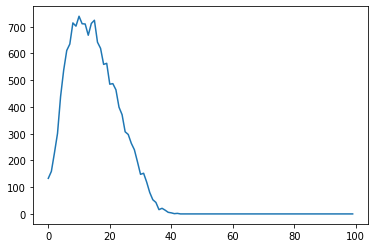

In [ ]:
df_error1 = u.fit_and_metrics(modelo_1(), 1, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=10)

In [ ]:
df_error1

n_errores  n_tableros
0         0.0       133.0
1         1.0       159.0
2         2.0       228.0
3         3.0       301.0
4         4.0       439.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 2

In [ ]:
def modelo_2():
    modelo = Sequential()
    modelo.add(Dense(29, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(27, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.005)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 2 - val_loss: 0.16728492081165314 - val_accuracy: 0.4062459170818329
Modelo 2 - % de los tableros de validación están completamente bien predichos: 0.5826895377766138


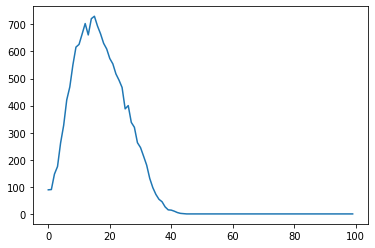

In [ ]:
df_error2 = u.fit_and_metrics(modelo_2(), 2, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=10)

In [ ]:
df_error2

n_errores  n_tableros
0         0.0        89.0
1         1.0        90.0
2         2.0       147.0
3         3.0       175.0
4         4.0       262.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 3

In [ ]:
def modelo_3():
    modelo = Sequential()
    modelo.add(Dense(256, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.005)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 3 - val_loss: 0.1574242115020752 - val_accuracy: 0.3623805046081543
Modelo 3 - % de los tableros de validación están completamente bien predichos: 0.4386539216970014


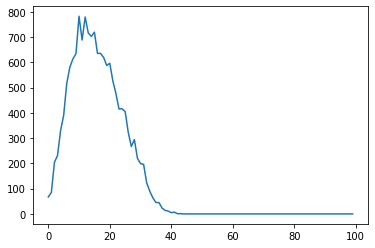

In [ ]:
df_error3 = u.fit_and_metrics(modelo_3(), 3, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=10)

In [ ]:
df_error3

n_errores  n_tableros
0         0.0        67.0
1         1.0        85.0
2         2.0       204.0
3         3.0       231.0
4         4.0       330.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 4

In [ ]:
def modelo_4():
    modelo = Sequential()
    modelo.add(Dense(512, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.005)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 4 - val_loss: 0.2997680604457855 - val_accuracy: 0.044454630464315414
Modelo 4 - % de los tableros de validación están completamente bien predichos: 0.0


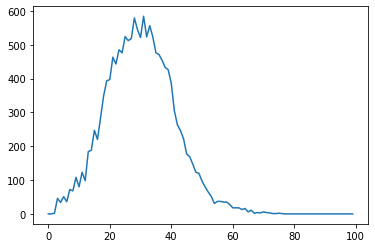

In [ ]:
df_error4 = u.fit_and_metrics(modelo_4(), 4, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=10)

In [ ]:
df_error4

n_errores  n_tableros
0         0.0         0.0
1         1.0         0.0
2         2.0         2.0
3         3.0        46.0
4         4.0        34.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 5

In [ ]:
def modelo_5():
    modelo = Sequential()
    modelo.add(Dense(1024, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 5 - val_loss: 0.14447563886642456 - val_accuracy: 0.24407489597797394
Modelo 5 - % de los tableros de validación están completamente bien predichos: 1.0278905329317796


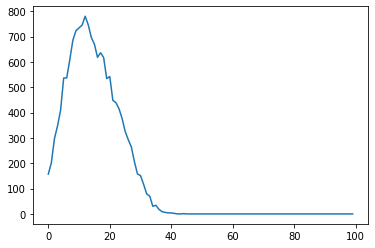

In [ ]:
df_error5 = u.fit_and_metrics(modelo_5(), 5, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=10)

In [ ]:
df_error5

n_errores  n_tableros
0         0.0       157.0
1         1.0       202.0
2         2.0       297.0
3         3.0       347.0
4         4.0       409.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 6

In [ ]:
def modelo_6():
    modelo = Sequential()
    modelo.add(Dense(1024, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 6 - val_loss: 0.1335962563753128 - val_accuracy: 0.545894980430603
Modelo 6 - % de los tableros de validación están completamente bien predichos: 1.7415215398716772


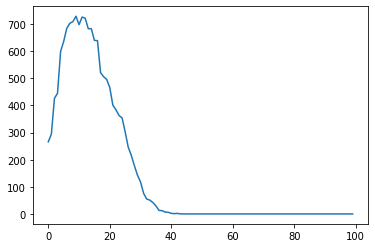

In [ ]:
df_error6 = u.fit_and_metrics(modelo_6(), 6, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=30)

In [ ]:
df_error6

n_errores  n_tableros
0         0.0       266.0
1         1.0       294.0
2         2.0       426.0
3         3.0       445.0
4         4.0       599.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 7

In [ ]:
def modelo_7():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 7 - val_loss: 0.14533212780952454 - val_accuracy: 0.5024223923683167
Modelo 7 - % de los tableros de validación están completamente bien predichos: 0.8969490637684955


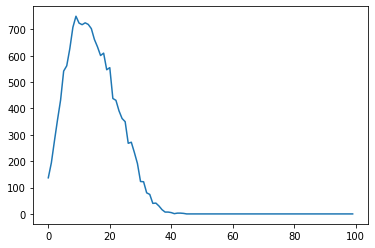

In [ ]:
df_error7 = u.fit_and_metrics(modelo_7(), 7, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=30)

In [ ]:
df_error7

n_errores  n_tableros
0         0.0       137.0
1         1.0       194.0
2         2.0       277.0
3         3.0       357.0
4         4.0       432.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 8

In [ ]:
def modelo_8():
    modelo = Sequential()
    modelo.add(Dense(1024, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 8 - val_loss: 0.10533924400806427 - val_accuracy: 0.5600366592407227
Modelo 8 - % de los tableros de validación están completamente bien predichos: 2.6908471913054863


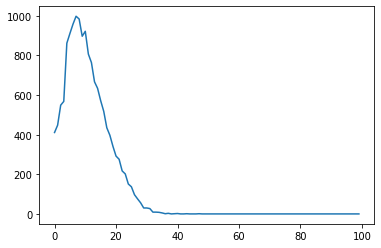

In [ ]:
df_error8 = u.fit_and_metrics(modelo_8(), 8, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=30)

In [ ]:
df_error8

n_errores  n_tableros
0         0.0       411.0
1         1.0       448.0
2         2.0       549.0
3         3.0       568.0
4         4.0       862.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 9

In [ ]:
def modelo_9():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 9 - val_loss: 0.10824421793222427 - val_accuracy: 0.5729343891143799
Modelo 9 - % de los tableros de validación están completamente bien predichos: 2.2129108288594996


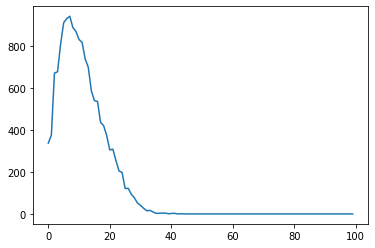

In [ ]:
df_error9 = u.fit_and_metrics(modelo_9(), 9, x_train, y_train, x_test, y_test, 
                              epochs=200, patience=30)

### Modelo 10

In [ ]:
def modelo_10():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 10 - val_loss: 0.10578694939613342 - val_accuracy: 0.5880581140518188
Modelo 10 - % de los tableros de validación están completamente bien predichos: 2.1998166819431715


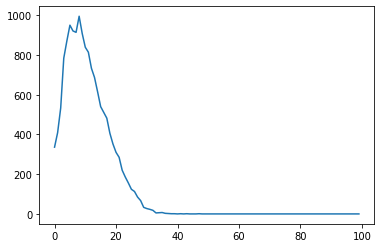

In [ ]:
df_error10 = u.fit_and_metrics(modelo_10(), 10, x_train, y_train, x_test, y_test, 
                               epochs=200, patience=10)

In [ ]:
df_error10

n_errores  n_tableros
0         0.0       336.0
1         1.0       409.0
2         2.0       533.0
3         3.0       784.0
4         4.0       870.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 11

In [ ]:
def modelo_11():
    modelo = Sequential()
    modelo.add(Dense(4096, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(4096, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(4096, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 11 - val_loss: 0.44762200117111206 - val_accuracy: 0.015320152044296265
Modelo 11 - % de los tableros de validación están completamente bien predichos: 0.0


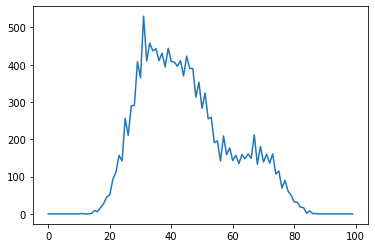

In [ ]:
df_error11 = u.fit_and_metrics(modelo_11(), 11, x_train, y_train, x_test, y_test, 
                               epochs=200, patience=30)

In [ ]:
df_error11

n_errores  n_tableros
0         0.0         0.0
1         1.0         0.0
2         2.0         0.0
3         3.0         0.0
4         4.0         0.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 12

In [6]:
def modelo_12():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 12 - val_loss: 0.13711437582969666 - val_accuracy: 0.007594605442136526
Modelo 12 - % de los tableros de validación están completamente bien predichos: 22.53502684300118


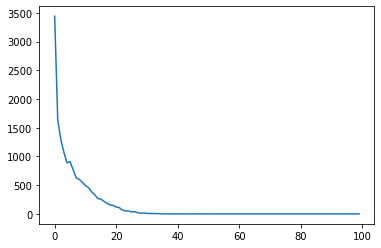

In [7]:
df_error12 = u.fit_and_metrics(modelo_12(), 12, x_train, y_train, x_test, y_test, 
                               epochs=300, patience=70)

In [8]:
df_error12

n_errores  n_tableros
0         0.0      3442.0
1         1.0      1637.0
2         2.0      1296.0
3         3.0      1071.0
4         4.0       890.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 13

In [9]:
def modelo_13():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 13 - val_loss: 0.06317111104726791 - val_accuracy: 0.6047531962394714
Modelo 13 - % de los tableros de validación están completamente bien predichos: 17.572345161712715


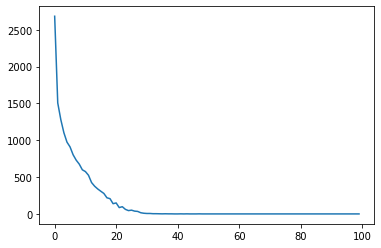

In [10]:
df_error13 = u.fit_and_metrics(modelo_13(), 13, x_train, y_train, x_test, y_test, 
                               epochs=300, patience=70)

In [11]:
df_error13

n_errores  n_tableros
0         0.0      2684.0
1         1.0      1507.0
2         2.0      1280.0
3         3.0      1102.0
4         4.0       975.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 14

In [ ]:
def modelo_14():
    modelo = Sequential()
    modelo.add(Dense(4096, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 14 - val_loss: 0.1636114865541458 - val_accuracy: 0.16884902119636536
Modelo 14 - % de los tableros de validación están completamente bien predichos: 0.5695953908602854


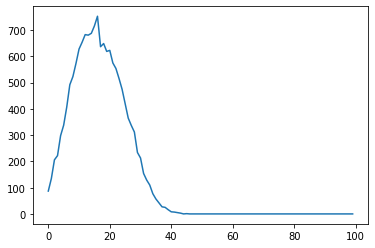

In [ ]:
df_error14 = u.fit_and_metrics(modelo_14(), 14, x_train, y_train, x_test, y_test, 
                               epochs=200, patience=30)

### Modelo 15

In [ ]:
def modelo_15():
    modelo = Sequential()
    modelo.add(Dense(8102, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(4096, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 15 - val_loss: 0.20121987164020538 - val_accuracy: 0.16878356039524078
Modelo 15 - % de los tableros de validación están completamente bien predichos: 0.4321068482388372


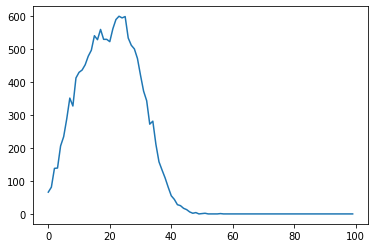

In [ ]:
df_error15 = u.fit_and_metrics(modelo_15(), 15, x_train, y_train, x_test, y_test, 
                               epochs=200, patience=30)

In [ ]:
df_error15

n_errores  n_tableros
0         0.0        66.0
1         1.0        81.0
2         2.0       138.0
3         3.0       139.0
4         4.0       206.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 16

In [12]:
def modelo_16():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 16 - val_loss: 0.0606209971010685 - val_accuracy: 0.6794552803039551
Modelo 16 - % de los tableros de validación están completamente bien predichos: 18.678800576142464


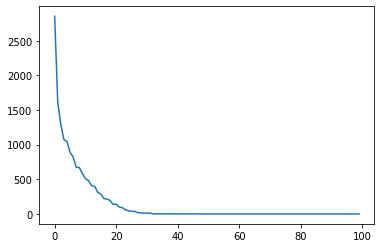

In [13]:
df_error16 = u.fit_and_metrics(modelo_16(), 16, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [14]:
df_error16

n_errores  n_tableros
0         0.0      2853.0
1         1.0      1613.0
2         2.0      1291.0
3         3.0      1072.0
4         4.0      1047.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 17

In [15]:
def modelo_17():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 17 - val_loss: 0.05886676535010338 - val_accuracy: 0.6776875853538513
Modelo 17 - % de los tableros de validación están completamente bien predichos: 19.79180306403038


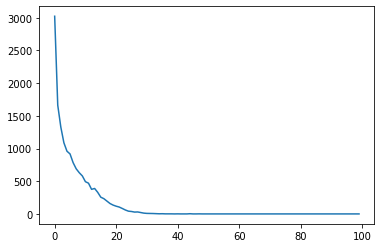

In [16]:
df_error17 = u.fit_and_metrics(modelo_17(), 17, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [17]:
df_error17

n_errores  n_tableros
0         0.0      3023.0
1         1.0      1663.0
2         2.0      1328.0
3         3.0      1088.0
4         4.0       959.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 18

In [18]:
def modelo_18():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 18 - val_loss: 0.06239552050828934 - val_accuracy: 0.6673431992530823
Modelo 18 - % de los tableros de validación están completamente bien predichos: 16.14508314783292


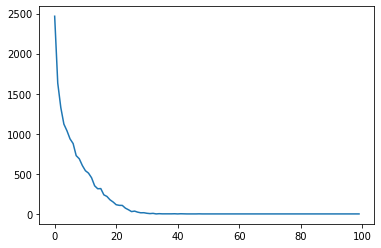

In [19]:
df_error18 = u.fit_and_metrics(modelo_18(), 18, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [20]:
df_error18

n_errores  n_tableros
0         0.0      2466.0
1         1.0      1632.0
2         2.0      1326.0
3         3.0      1120.0
4         4.0      1037.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 19

In [21]:
def modelo_19():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 19 - val_loss: 0.0831211507320404 - val_accuracy: 0.6202042698860168
Modelo 19 - % de los tableros de validación están completamente bien predichos: 7.149404216315307


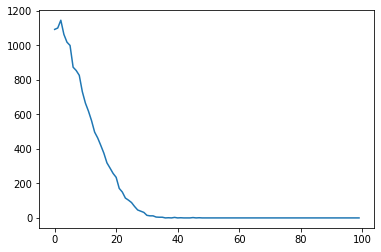

In [22]:
df_error19 = u.fit_and_metrics(modelo_19(), 19, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [23]:
df_error19

n_errores  n_tableros
0         0.0      1092.0
1         1.0      1100.0
2         2.0      1145.0
3         3.0      1063.0
4         4.0      1018.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 20

In [24]:
def modelo_20():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 20 - val_loss: 0.08526647090911865 - val_accuracy: 0.6228231191635132
Modelo 20 - % de los tableros de validación están completamente bien predichos: 4.37999214351185


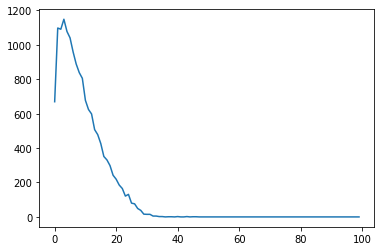

In [25]:
df_error20 = u.fit_and_metrics(modelo_20(), 20, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [26]:
df_error20

n_errores  n_tableros
0         0.0       669.0
1         1.0      1097.0
2         2.0      1090.0
3         3.0      1148.0
4         4.0      1077.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 21

In [ ]:
def modelo_21():
    modelo = Sequential()
    modelo.add(Dense(2048, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo


Modelo 21 - val_loss: 0.11023081839084625 - val_accuracy: 0.5942778587341309
Modelo 21 - % de los tableros de validación están completamente bien predichos: 3.2473484352494433


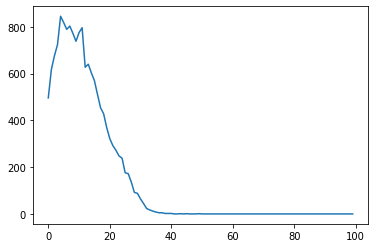

In [ ]:
df_error21 = u.fit_and_metrics(modelo_21(), 21, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [ ]:
df_error21

n_errores  n_tableros
0         0.0       496.0
1         1.0       617.0
2         2.0       676.0
3         3.0       724.0
4         4.0       845.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]

### Modelo 22

In [16]:
def modelo_22():
    modelo = Sequential()
    modelo.add(Dense(4096, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

In [ ]:
df_error22 = u.fit_and_metrics(modelo_22(), 22, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
df_error22

### Modelo 23

In [ ]:
def modelo_23():
    modelo = Sequential()
    modelo.add(Dense(4096, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

In [ ]:
df_error23 = u.fit_and_metrics(modelo_23(), 23, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [ ]:
df_error23

### Modelo 24

In [33]:
def modelo_24():
    modelo = Sequential()
    modelo.add(Dense(4096, input_shape=(240,), activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(2048, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(1024, activation='relu'))
    modelo.add(Dropout(0.05))
    modelo.add(Dense(225, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.0001)
    modelo.compile(optimizer=optimizer, loss='mae', metrics=['accuracy'])
    return modelo

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Modelo 24 - val_loss: 0.06191198527812958 - val_accuracy: 0.6800445318222046
Modelo 24 - % de los tableros de validación están completamente bien predichos: 17.53306272096373


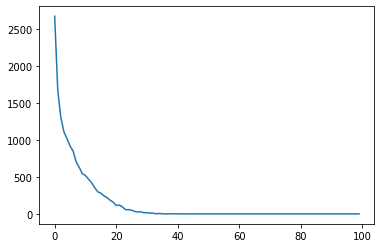

In [34]:
df_error24 = u.fit_and_metrics(modelo_24(), 24, x_train, y_train, x_test, y_test, 
                               epochs=3000, patience=70)

In [35]:
df_error24

n_errores  n_tableros
0         0.0      2678.0
1         1.0      1677.0
2         2.0      1308.0
3         3.0      1114.0
4         4.0      1020.0
..        ...         ...
95       95.0         0.0
96       96.0         0.0
97       97.0         0.0
98       98.0         0.0
99       99.0         0.0

[100 rows x 2 columns]